# GHOST - Quantum Computing z Qiskit 2.2.2

## 1. Potrzebne pakiety

In [1]:
2+2

4

In [1]:
%pip install --upgrade pip
%pip install qiskit==2.2.2
%pip install matplotlib
%pip install numpy
%pip install seaborn
%pip install ipywidgets

from qiskit import QuantumCircuit, transpile
from qiskit.providers.basic_provider import BasicProvider
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_state_qsphere
from qiskit.quantum_info import Statevector
import math
import numpy as np
from importlib.metadata import version

# Wybór backendu, w naszym przypadku działamy na symulatorze
provider = BasicProvider()
backend = provider.get_backend('basic_simulator')

print(f"Qiskit {version('qiskit')}")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Qiskit 2.2.2


## 2. Lekka powtórka


### Klasyczne bity vs kubity

**Klasyczny bit:**
- Może przyjmować wartość 0 lub 1  
- Stan: |0⟩ lub |1⟩  

**Kubit (Qubit - Quantum Bit):**
- Może być 0, 1 **lub obydwoma naraz** (superpozycja)  
- Stan: α|0⟩ + β|1⟩, gdzie |α|² + |β|² = 1  

---

### Kluczowe zjawiska kwantowe

1. **Superpozycja** – kubit może istnieć w wielu stanach jednocześnie  
2. **Splątanie (Entanglement)** – kubity mogą być ze sobą powiązane tak, że stan jednego natychmiast wpływa na drugi  
3. **Interferencja** – stany kwantowe mogą się wzmacniać lub znosić nawzajem  

---

### Matematyka stojąca za stanami kwantowymi

Stany kwantowe reprezentujemy jako **wektory** w przestrzeni zespolonej.

**Stany pojedynczego kubitu:**
- |0⟩ = [1, 0]ᵀ (wektor kolumnowy)  
- |1⟩ = [0, 1]ᵀ  
- Ogólny stan: |ψ⟩ = [α, β]ᵀ = α|0⟩ + β|1⟩  

**Stany dwóch kubitów:**
- |00⟩ = [1, 0, 0, 0]ᵀ  
- |01⟩ = [0, 1, 0, 0]ᵀ  
- |10⟩ = [0, 0, 1, 0]ᵀ  
- |11⟩ = [0, 0, 0, 1]ᵀ  
- Ogólny stan: dla *n* kubitów mamy **2ⁿ amplitud!**

**Prawdopodobieństwo** otrzymania danego stanu |i⟩ po pomiarze wynosi **|amplitudaᵢ|²**.


## 3 Zrozumienie symulatorów kwantowych w Qiskit 2.2.2

W Qiskit 2.2.2 do symulacji używamy **BasicProvider**.

### Rodzaje symulatorów:

1. **Basic Simulator** (`qiskit.providers.basic_provider`)
   - Symuluje pełny stan kwantowy oraz wyniki pomiarów
   - Symulacja „idealna” (bez szumów)
   - Pozwala obserwować amplitudy, fazy i statystyki pomiarowe

2. **Analiza wektora stanu (Statevector)**
   - Bezpośredni dostęp do amplitud stanu kwantowego


Statevector: [0.70710678+0.j 0.70710678+0.j]
Amplitudes: α = 0.707+0.000j, β = 0.707+0.000j
Probabilities: P(0) = |α|² = 0.500, P(1) = |β|² = 0.500


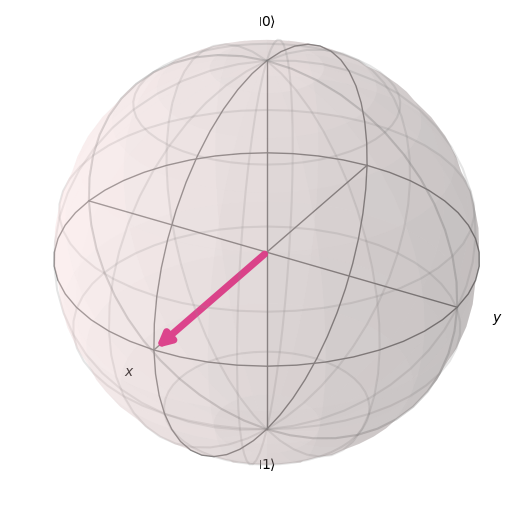

In [2]:
# Tworzymy prostą superpozycję
qc = QuantumCircuit(1)
qc.h(0)  # Hadamard

# Analiza przy pomocy Statevector
statevector = Statevector.from_instruction(qc)

print(f"Statevector: {statevector.data}")
print(f"Amplitudes: α = {statevector.data[0]:.3f}, β = {statevector.data[1]:.3f}")
print(f"Probabilities: P(0) = |α|² = {abs(statevector.data[0])**2:.3f}, P(1) = |β|² = {abs(statevector.data[1])**2:.3f}")

# Wizualizacja sfery Blocha (Bloch sphere)
bloch_vector = [
    2 * (statevector.data[0].conjugate() * statevector.data[1]).real,
    2 * (statevector.data[0].conjugate() * statevector.data[1]).imag,
    abs(statevector.data[0])**2 - abs(statevector.data[1])**2
]

plot_bloch_vector(bloch_vector)

## Link do symulatora sfery Blocha
[Bloch sphere simulator](https://bits-and-electrons.github.io/bloch-sphere-simulator)

## Zadanie 1

Stwóz obwód kwantowy który jest |1⟩ zamiast |0⟩, dodaj Hadamarda i sprawdź, co zmieni się w danych Statevector

In [4]:
# Stwórz obwód zaczynający się jako |1⟩

# Dodaj Hadamarda

# Skorzystaj z Statevector aby wyciągnąć informację o amplitudach oraz prawdopodobieństwach


Statevector: [ 0.70710678+0.j -0.70710678+0.j]
Amplitudes: α = 0.707+0.000j, β = -0.707+0.000j
Probabilities: P(0) = |α|² = 0.500, P(1) = |β|² = 0.500


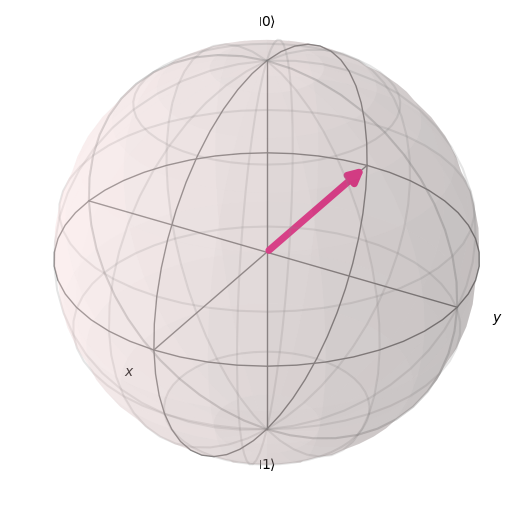

In [5]:
# Tworzymy prostą superpozycję
qc = QuantumCircuit(1)
qc.x(0)  # Not
qc.h(0)  # Hadamard

# Analiza przy pomocy Statevector
statevector = Statevector.from_instruction(qc)

print(f"Statevector: {statevector.data}")
print(f"Amplitudes: α = {statevector.data[0]:.3f}, β = {statevector.data[1]:.3f}")
print(f"Probabilities: P(0) = |α|² = {abs(statevector.data[0])**2:.3f}, P(1) = |β|² = {abs(statevector.data[1])**2:.3f}")

# Wizualizacja sfery Blocha (Bloch sphere)
bloch_vector = [
    2 * (statevector.data[0].conjugate() * statevector.data[1]).real,
    2 * (statevector.data[0].conjugate() * statevector.data[1]).imag,
    abs(statevector.data[0])**2 - abs(statevector.data[1])**2
]

plot_bloch_vector(bloch_vector)

## 4. Bramki kwantowe

**Pauli-X (bramka NOT):**
```
X = [0 1]
    [1 0]
```

**Pauli-Y:**
```
Y = [0 -i]
    [i  0]
```

**Pauli-Z:**
```
Z = [1  0]
    [0 -1]
```

**Hadamard**
```
H = (1/√2) [1  1]
           [1 -1]
```
H|0⟩ = (|0⟩ + |1⟩)/√2, H|1⟩ = (|0⟩ - |1⟩)/√2

X|0⟩ = [0.+0.j 1.+0.j]
Z|+⟩ = [ 0.70710678+0.j -0.70710678+0.j] (phase flipped)
Y|0⟩ = [0.+0.j 0.+1.j] (bit and phase flip)


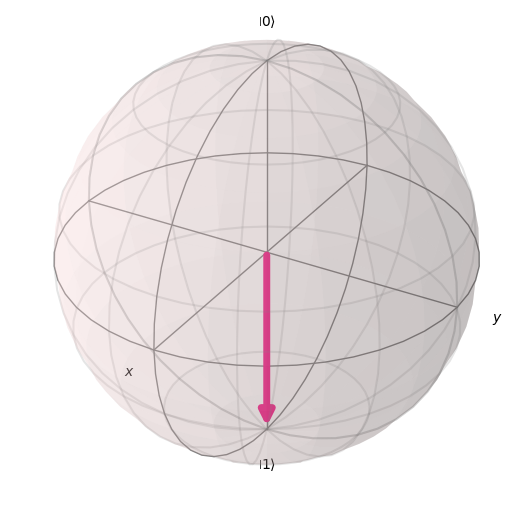

In [6]:
# X gate (NOT)
qc_x = QuantumCircuit(1)
qc_x.x(0)
state_x = Statevector.from_instruction(qc_x)
print(f"X|0⟩ = {state_x.data}")

# Z gate
qc_z = QuantumCircuit(1)
qc_z.h(0)
qc_z.z(0)
state_z = Statevector.from_instruction(qc_z)
print(f"Z|+⟩ = {state_z.data} (phase flipped)")

# Y gate
qc_y = QuantumCircuit(1)
qc_y.y(0)
state_y = Statevector.from_instruction(qc_y)
print(f"Y|0⟩ = {state_y.data} (bit and phase flip)")

# Wizualizacja sfery Blocha
def bloch_coords(state):
    a, b = state.data
    return [
        2 * (a.conjugate() * b).real,  # x = Re(2a*b*)
        2 * (a.conjugate() * b).imag,  # y = Im(2a*b*)
        abs(a)**2 - abs(b)**2          # z = |a|² - |b|²
    ]

plot_bloch_vector(bloch_coords(state_x))

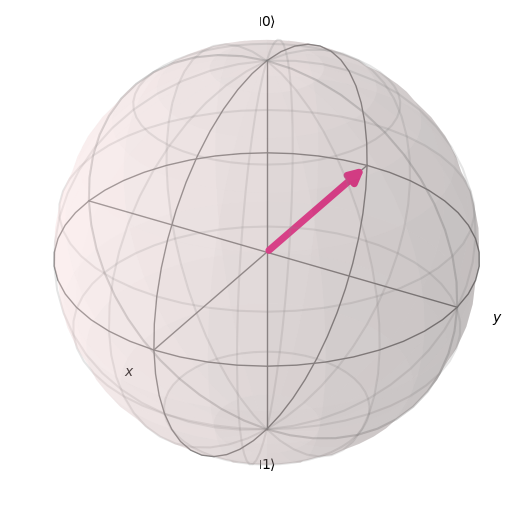

In [7]:
plot_bloch_vector(bloch_coords(state_z))

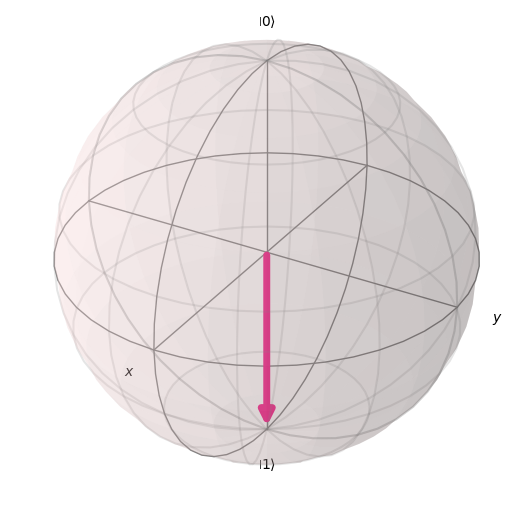

In [8]:
plot_bloch_vector(bloch_coords(state_y))

### Bramki rotacyjne

Bramki rotacyjne obracają stan kubitu według osi sfery Blocha:

**RX(θ)**
```
RX(θ) = [cos(θ/2)  -i*sin(θ/2)]
        [-i*sin(θ/2)  cos(θ/2)]
```

**RY(θ)**
```
RY(θ) = [cos(θ/2)  -sin(θ/2)]
        [sin(θ/2)   cos(θ/2)]
```

**RZ(θ)**
```
RZ(θ) = [e^(-iθ/2)  0]
        [0  e^(iθ/2)]
```

In [9]:
def bloch_coords(state):
    a, b = state.data
    return [
        2 * (a.conjugate() * b).real,  # x = Re(2a*b*)
        2 * (a.conjugate() * b).imag,  # y = Im(2a*b*)
        abs(a)**2 - abs(b)**2          # z = |a|² - |b|²
    ]

def show_rotation_effect(gate_func, angle, axis_name):
    qc = QuantumCircuit(1)
    qc.h(0)
    gate_func(qc, angle, 0)

    state = Statevector.from_instruction(qc)

    print(f"{axis_name}({angle:.2f}): {state.data}")
    bloch_vector = bloch_coords(state)
    return plot_bloch_vector(bloch_vector)

angles = [0, math.pi/4, math.pi/2, math.pi, 2*math.pi, 4*math.pi]

for angle in angles:
    print(f"\nRotation by {angle:.2f} radians ({angle/math.pi:.1f}π)")
    show_rotation_effect(lambda qc, theta, qubit: qc.rx(theta, qubit), angle, "RX")
    show_rotation_effect(lambda qc, theta, qubit: qc.ry(theta, qubit), angle, "RY")
    show_rotation_effect(lambda qc, theta, qubit: qc.rz(theta, qubit), angle, "RZ")



Rotation by 0.00 radians (0.0π)
RX(0.00): [0.70710678+0.j 0.70710678+0.j]
RY(0.00): [0.70710678+0.j 0.70710678+0.j]
RZ(0.00): [0.70710678+0.j 0.70710678+0.j]

Rotation by 0.79 radians (0.2π)
RX(0.79): [0.65328148-0.27059805j 0.65328148-0.27059805j]
RY(0.79): [0.38268343+0.j 0.92387953+0.j]
RZ(0.79): [0.65328148-0.27059805j 0.65328148+0.27059805j]

Rotation by 1.57 radians (0.5π)
RX(1.57): [0.5-0.5j 0.5-0.5j]
RY(1.57): [0.+0.j 1.+0.j]
RZ(1.57): [0.5-0.5j 0.5+0.5j]

Rotation by 3.14 radians (1.0π)
RX(3.14): [4.32978028e-17-0.70710678j 4.32978028e-17-0.70710678j]
RY(3.14): [-0.70710678+0.j  0.70710678+0.j]
RZ(3.14): [4.32978028e-17-0.70710678j 4.32978028e-17+0.70710678j]

Rotation by 6.28 radians (2.0π)
RX(6.28): [-0.70710678-8.65956056e-17j -0.70710678-8.65956056e-17j]
RY(6.28): [-0.70710678+0.j -0.70710678+0.j]
RZ(6.28): [-0.70710678-8.65956056e-17j -0.70710678+8.65956056e-17j]

Rotation by 12.57 radians (4.0π)
RX(12.57): [0.70710678+1.73191211e-16j 0.70710678+1.73191211e-16j]
RY(12.57

## 5. Dwukubitowe bramki

### CNOT (Controlled-NOT)
```
CNOT = [1 0 0 0]
       [0 1 0 0]
       [0 0 0 1]
       [0 0 1 0]
```

In [10]:
# Tworzenie stanu Bella krok po kroku
bell_steps = [
    ("Initial state |00⟩", QuantumCircuit(2)),
    ("After H on qubit 0", QuantumCircuit(2)),
    ("After CNOT", QuantumCircuit(2))
]

# Krok 1: |00⟩
step1 = QuantumCircuit(2)
bell_steps[0] = ("Initial state |00⟩", step1)
state1 = Statevector.from_instruction(step1)
print(f"1. {bell_steps[0][0]}: {state1.data}")

# Krok 2: H na kubit 0 -> (|00⟩ + |10⟩)/√2
step2 = QuantumCircuit(2)
step2.h(0)
bell_steps[1] = ("After H on qubit 0", step2)
state2 = Statevector.from_instruction(step2)
print(f"2. {bell_steps[1][0]}: {state2.data}")

# Krok 3: CNOT -> (|00⟩ + |11⟩)/√2
step3 = QuantumCircuit(2)
step3.h(0)
step3.cx(0, 1)
bell_steps[2] = ("After CNOT (Bell state)", step3)
state3 = Statevector.from_instruction(step3)
print(f"3. {bell_steps[2][0]}: {state3.data}")

print("\nMeasurement Probabilities")
print(f"P(00) = {abs(state3.data[0])**2:.3f}")
print(f"P(01) = {abs(state3.data[1])**2:.3f}")
print(f"P(10) = {abs(state3.data[2])**2:.3f}")
print(f"P(11) = {abs(state3.data[3])**2:.3f}")

1. Initial state |00⟩: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
2. After H on qubit 0: [ 0.70710678+0.j  0.70710678+0.j  0.        +0.j -0.        +0.j]
3. After CNOT (Bell state): [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]

Measurement Probabilities
P(00) = 0.500
P(01) = 0.000
P(10) = 0.000
P(11) = 0.500


### Zadanie 2

Istnieją 4 stany Bella:

1. |Φ⁺⟩ = (|00⟩ + |11⟩)/√2
2. |Φ⁻⟩ = (|00⟩ - |11⟩)/√2  
3. |Ψ⁺⟩ = (|01⟩ + |10⟩)/√2
4. |Ψ⁻⟩ = (|01⟩ - |10⟩)/√2

Jaki stan udało się stworzyć przed chwilą?
Stwórz pozostałe stany

In [11]:
# Stany Bella


In [12]:
def print_bell_state(x):
    #x = Statevector.from_instruction(y)
    print("====================")
    print(f"{x.data}")
    print("Measurement Probabilities")
    print(f"P(00) = {abs(x.data[0])**2:.3f}")
    print(f"P(01) = {abs(x.data[1])**2:.3f}")
    print(f"P(10) = {abs(x.data[2])**2:.3f}")
    print(f"P(11) = {abs(x.data[3])**2:.3f}")
    print("====================\n")


In [13]:
# Stworzono stan Phi+

# Utils
def print_bell_state(x):
    #x = Statevector.from_instruction(y)
    print("====================")
    print(f"{x.data}")
    print("Measurement Probabilities")
    print(f"P(00) = {abs(x.data[0])**2:.3f}")
    print(f"P(01) = {abs(x.data[1])**2:.3f}")
    print(f"P(10) = {abs(x.data[2])**2:.3f}")
    print(f"P(11) = {abs(x.data[3])**2:.3f}")
    print("====================\n")

# Phi- 
Phi_minus_qc = QuantumCircuit(2)
Phi_minus_qc.x(0)
Phi_minus_qc.h(0)
Phi_minus_qc.cx(0, 1)

print_bell_state(Statevector.from_instruction(Phi_minus_qc))

# Psi+ 
Psi_plus_qc = QuantumCircuit(2)
Psi_plus_qc.x(1)
Psi_plus_qc.h(0)
Psi_plus_qc.cx(0, 1)

print_bell_state(Statevector.from_instruction(Psi_plus_qc))

# Psi- 
Psi_minus_qc = QuantumCircuit(2)
Psi_minus_qc.x(0)
Psi_minus_qc.x(1)
Psi_minus_qc.h(0)
Psi_minus_qc.cx(0, 1)

print_bell_state(Statevector.from_instruction(Psi_minus_qc))

[ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]
Measurement Probabilities
P(00) = 0.500
P(01) = 0.000
P(10) = 0.000
P(11) = 0.500

[0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]
Measurement Probabilities
P(00) = 0.000
P(01) = 0.500
P(10) = 0.500
P(11) = 0.000

[ 0.        +0.j -0.70710678+0.j  0.70710678+0.j  0.        +0.j]
Measurement Probabilities
P(00) = 0.000
P(01) = 0.500
P(10) = 0.500
P(11) = 0.000



## 6. Tworzenie obwodu

     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


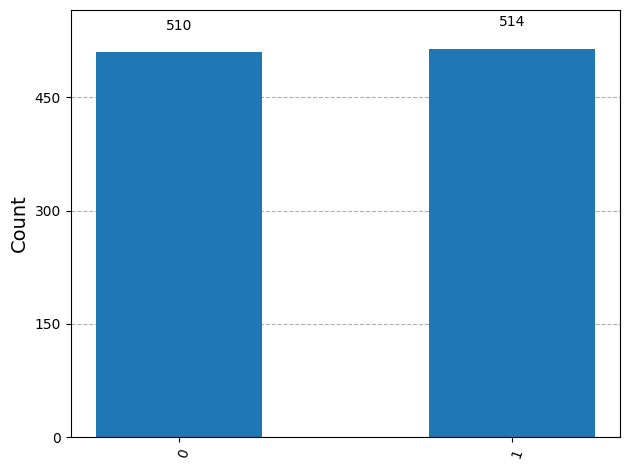

In [14]:
# Tworzymy obwód składający się z 1 kubita i 1 bita
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)

# Wizualizacja
print(qc.draw())

# Wykonujemy obwód korzystając z symulatora
transpiled_qc = transpile(qc, backend)
job = backend.run(transpiled_qc, shots=1024)
result = job.result()
counts = result.get_counts(transpiled_qc)

plot_histogram(counts)

### Zadanie 3

Stwórz obwód kwantowy, który:
1. ma 2 kubity
2. daje Hadamarda na drugi kubit
3. pierwszy kubit robi CNOT na drugi
3. mierzy obydwa kubity

In [15]:
# Stwórz obwód

# Dodaj bramki

# Zmierz obwód

# Wykonaj obwód na symulatorze

# Przedstaw wyniki


               ┌─┐   
q_0: ───────■──┤M├───
     ┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ H ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


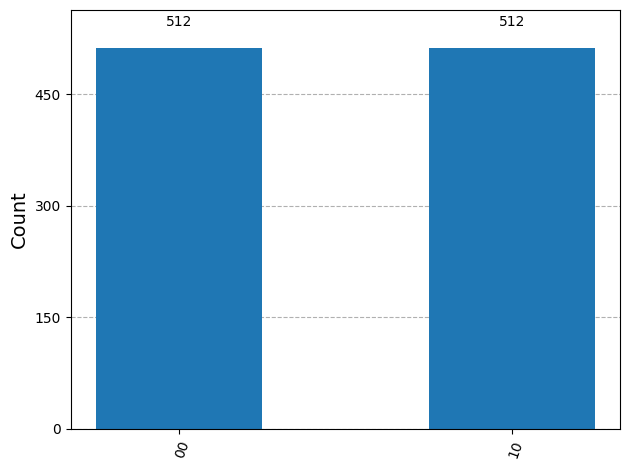

In [16]:
# Tworzymy obwód składający się z 1 kubita i 1 bita
qc = QuantumCircuit(2, 2)
qc.h(1)
qc.cx(0,1)
qc.measure(0, 0)
qc.measure(1, 1)

# Wizualizacja
print(qc.draw())

# Wykonujemy obwód korzystając z symulatora
transpiled_qc = transpile(qc, backend)
job = backend.run(transpiled_qc, shots=1024)
result = job.result()
counts = result.get_counts(transpiled_qc)

plot_histogram(counts)

## 7. Trochę ciekawszy obwód


     ┌───┐     ┌─────────┐┌─┐   
q_0: ┤ H ├──■──┤ Rx(π/4) ├┤M├───
     ├───┤┌─┴─┐├─────────┤└╥┘┌─┐
q_1: ┤ H ├┤ X ├┤ Ry(π/3) ├─╫─┤M├
     └───┘└───┘└─────────┘ ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1 


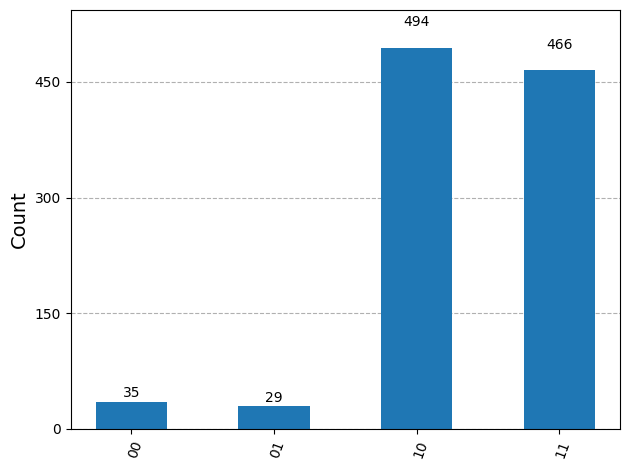

In [17]:
qc = QuantumCircuit(2, 2)

qc.h(0)
qc.h(1)

qc.cx(0, 1)

qc.rx(math.pi/4, 0)
qc.ry(math.pi/3, 1)

qc.measure([0, 1], [0, 1])

print(qc.draw())

transpiled_qc = transpile(qc, backend)
job = backend.run(transpiled_qc, shots=1024)
result = job.result()
counts = result.get_counts(transpiled_qc)

plot_histogram(counts)

In [18]:
def show_state(sv: Statevector, title=""):
    n = int(math.log2(len(sv)))
    print(f"\n=== {title} ===")
    print("basis | amplitude (a+bi) | |amp|^2  | phase [rad]")
    for i, amp in enumerate(sv.data):
        label = format(i, f"0{n}b")
        prob = (abs(amp)**2)
        phase = np.angle(amp)
        print(f"{label:>5} | {amp.real:+.4f}{amp.imag:+.4f}i | {prob:6.4f} | {phase:+.4f}")


In [19]:
qc = QuantumCircuit(2)

# Krok 0: stan początkowy |00>
sv0 = Statevector.from_label('00')
show_state(sv0, "Krok 0: start |00>")

# Krok 1: H na obu kubitach (superpozycja)
qc.h(0); qc.h(1)
sv1 = Statevector.from_instruction(qc)
show_state(sv1, "Krok 1: po H(0), H(1)")

# Krok 2: CX(0->1) (splątanie)
qc.cx(0, 1)
sv2 = Statevector.from_instruction(qc)
show_state(sv2, "Krok 2: po CX(0,1)")

# Krok 3: RX(pi/4) na kubicie 0
qc.rx(math.pi/4, 0)
sv3 = Statevector.from_instruction(qc)
show_state(sv3, "Krok 3: po RX(pi/4) na q0")

# Krok 4: RY(pi/3) na kubicie 1
qc.ry(math.pi/3, 1)
sv4 = Statevector.from_instruction(qc)
show_state(sv4, "Krok 4: po RY(pi/3) na q1")



=== Krok 0: start |00> ===
basis | amplitude (a+bi) | |amp|^2  | phase [rad]
   00 | +1.0000+0.0000i | 1.0000 | +0.0000
   01 | +0.0000+0.0000i | 0.0000 | +0.0000
   10 | +0.0000+0.0000i | 0.0000 | +0.0000
   11 | +0.0000+0.0000i | 0.0000 | +0.0000

=== Krok 1: po H(0), H(1) ===
basis | amplitude (a+bi) | |amp|^2  | phase [rad]
   00 | +0.5000+0.0000i | 0.2500 | +0.0000
   01 | +0.5000+0.0000i | 0.2500 | +0.0000
   10 | +0.5000+0.0000i | 0.2500 | +0.0000
   11 | +0.5000+0.0000i | 0.2500 | +0.0000

=== Krok 2: po CX(0,1) ===
basis | amplitude (a+bi) | |amp|^2  | phase [rad]
   00 | +0.5000+0.0000i | 0.2500 | +0.0000
   01 | +0.5000+0.0000i | 0.2500 | +0.0000
   10 | +0.5000+0.0000i | 0.2500 | +0.0000
   11 | +0.5000+0.0000i | 0.2500 | +0.0000

=== Krok 3: po RX(pi/4) na q0 ===
basis | amplitude (a+bi) | |amp|^2  | phase [rad]
   00 | +0.4619-0.1913i | 0.2500 | -0.3927
   01 | +0.4619-0.1913i | 0.2500 | -0.3927
   10 | +0.4619-0.1913i | 0.2500 | -0.3927
   11 | +0.4619-0.1913i | 0.2500 

## 8. Algorytmy kwantowe – podstawowe elementy

### Klasyczny problem wyszukiwania

Załóżmy, że mamy bazę danych z N elementami i chcemy znaleźć jeden konkretny element:

- Algorytm klasyczny: **O(N)** czasu (trzeba sprawdzić każdy element)
- Algorytm kwantowy: **O(√N)** czasu - **algorytm Grovera**

---

### Kwantowa Transformcja Fouriera (QFT)

Wiele algorytmów kwantowych wykorzystuje **QFT**, czyli kwantowy odpowiednik szybkiej transformcji Fouriera (FFT).
QFT jest kluczowa m.in. dla:

- Szacowania fazy kwantowej (*Quantum Phase Estimation*)
- Algorytmu Shora
- Wielu innych algorytmów kwantowych


## 9. Algorytm wyszukiwania Grovera

Algorytm Grovera działa jak **kwantowa wyszukiwarka**
Potrafi znaleźć konkretny element w **nieposortowanej bazie danych** zawierającej N elementów w zaledwie **O(√N)** krokach

---

### Działanie:

1. **Inicjalizacja** - rozpocznij z wszystkimi kubitami w stanie superpozycji
2. **Oracle** - zaznacza (oznacza fazowo) element, którego szukamy
3. **Dyfuzja (amplitude amplification)** - wzmacnia amplitudę oznaczonego stanu
4. **Powtarzanie** - stosuj oracle i dyfuzję około **√N** razy
5. **Pomiar** - dokonaj pomiaru, aby z wysokim prawdopodobieństwem uzyskać szukany wynik



In [20]:
def grover_oracle(target):
    n = len(target)
    oracle = QuantumCircuit(n, name='Oracle')

    # Negacja bitu jeżeli cel jest "0"
    for i, bit in enumerate(target):
        if bit == '0':
            oracle.x(i)

    # Multi-kontrolowana bramka Z
    oracle.h(n - 1)
    oracle.mcx(list(range(n - 1)), n - 1)  # Multi-kontrolowana bramka X
    oracle.h(n - 1)

    # Znowu negujemy
    for i, bit in enumerate(target):
        if bit == '0':
            oracle.x(i)

    oracle.barrier()
    return oracle


def diffusion_operator(n):
    diffusion = QuantumCircuit(n, name='Diffusion')

    diffusion.h(range(n))
    diffusion.x(range(n))

    diffusion.h(n - 1)
    diffusion.mcx(list(range(n - 1)), n - 1)
    diffusion.h(n - 1)

    diffusion.x(range(n))
    diffusion.h(range(n))

    diffusion.barrier()

    return diffusion


def grover_search(target,iterations=0):
    n_qubits = len(target)
    qc = QuantumCircuit(n_qubits, n_qubits)

    # Krok 1: superpozycja
    qc.h(range(n_qubits))

    # Krok 2: liczymy optymalną liczbę iteracji
    if iterations == 0: iterations = int(round((math.pi / 4) * math.sqrt(2 ** n_qubits)))

    oracle = grover_oracle(target)
    diffuser = diffusion_operator(n_qubits)

    # Krok 3: dodajemy iterację Grovera
    for _ in range(iterations):
        qc.append(oracle.to_gate(), range(n_qubits))
        qc.append(diffuser.to_gate(), range(n_qubits))

    # Krok 4: mierzymy kubity
    qc.measure(range(n_qubits), range(n_qubits))

    return qc.decompose()

In [21]:
target = '101'
n_qubits = 3

grover_circuit = grover_search(target)

print(f"Searching for '{target}' in {2**n_qubits} possible states")
print("\nGrover circuit:")
print(grover_circuit.draw())

transpiled_grover = transpile(grover_circuit, backend)
job = backend.run(transpiled_grover, shots=1024)
result = job.result()
counts = result.get_counts(transpiled_grover)

print("\nResults - the target state should appear most frequently!")
plot_histogram(counts)

QiskitError: 'One or more instructions cannot be converted to a gate. "barrier" is not a gate instruction'

## Elementy algorytmu w kodzie

### 1) Oracle (znacznik rozwiązania)
Funkcja: `grover_oracle(target)`

**Co robi:** wprowadza **odwrócenie fazy** (−1) **tylko** dla docelowego stanu `|target⟩`.

1. Dla każdego bitu równemu `0` w `target` stosujemy `X` (negacja), aby zamienić `|target⟩` w `|11…1⟩`.
2. „Kanapka Hadamarda” na ostatnim kubicie:
   - `H` → `mcx` (multi-controlled X) sterowany wszystkimi pozostałymi kubitami → `H`
   - Równoważne **multi-controlled Z** na `|11…1⟩` → faza staje się `−1`.
3. Cofamy wstępne `X`, by wrócić do oryginalnego kodowania bitów.

Efekt: tylko `|target⟩` dostaje fazę `−1`, pozostałe stany bez zmian.

---

### 2) Dyfuzor (inversion about the mean)
Funkcja: `diffusion_operator(n)`

**Co robi:** odbija wszystkie amplitudy względem ich średniej → **wzmacnia amplitudę rozwiązania**, osłabia pozostałe.

1. `H` na wszystkich kubitach → przejście do bazy Hadamarda.
2. `X` na wszystkich kubitach.
3. „Kanapka Hadamarda” + `mcx` na ostatnim kubicie (jak w oraklu) → faza `−1` tylko dla `|00…0⟩` w tej bazie.
4. Cofamy `X`, potem `H`.


---


## Przebieg algorytmu (w funkcji `grover_search`)
1. **Superpozycja:** `H` na wszystkich kubitach → równy rozkład po `2^n` stanach.
2. **Pętle Grovera (r razy):**
   - dołącz `Oracle` (oznacz stan docelowy fazą −1),
   - dołącz `Diffuser` (inwersja względem średniej).
3. **Pomiar:** `measure(range(n), range(n))`.

**Oczekiwany efekt:** po ~√N iteracjach **stan `target` dominuje** w histogramie zliczeń.

### Zadanie 4

1. Sprawdź działanie algorytmnu dla innych stanów: '000', '111', '010'
2. Sprawdź działanie algorytmu dla innej liczby qubitów: 2, 4, 5
3. Co się stanie, jeżeli zwiększymy liczbę shotów dwukrotnie?


In [ ]:
# Sprawdź inny stan

# Zmień liczbę qubitów

# Podwój liczbę iteracji


Searching for '1000' in 16 possible states

Grover circuit:
     ┌────────────┐               ┌───┐┌───┐                    ┌───┐┌───┐     »
q_0: ┤ U(π/2,0,π) ├────────────■──┤ H ├┤ X ├─────────────────■──┤ X ├┤ H ├─────»
     ├────────────┤┌───┐       │  ├───┤├───┤┌───┐            │  ├───┤├───┤┌───┐»
q_1: ┤ U(π/2,0,π) ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├────────────■──┤ X ├┤ H ├┤ X ├»
     ├────────────┤├───┤       │  ├───┤├───┤├───┤            │  ├───┤├───┤├───┤»
q_2: ┤ U(π/2,0,π) ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├────────────■──┤ X ├┤ H ├┤ X ├»
     ├────────────┤├───┤┌───┐┌─┴─┐├───┤├───┤├───┤┌───┐┌───┐┌─┴─┐├───┤├───┤├───┤»
q_3: ┤ U(π/2,0,π) ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├»
     └────────────┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
c: 4/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«                    ┌───┐┌───┐                  

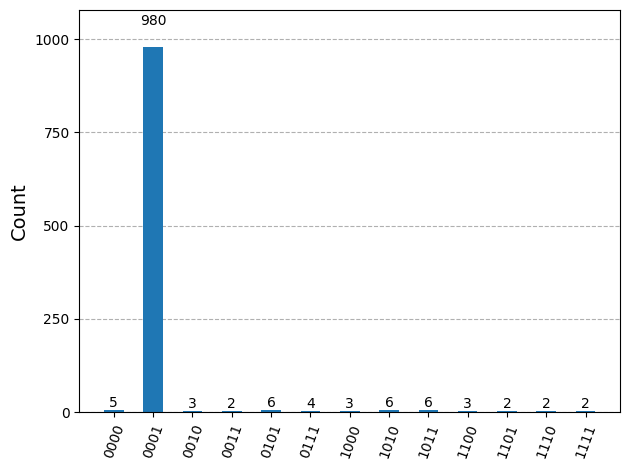

In [ ]:
target = '1000'
n_qubits = 4

grover_circuit = grover_search(target)

print(f"Searching for '{target}' in {2**n_qubits} possible states")
print("\nGrover circuit:")
print(grover_circuit.draw())

transpiled_grover = transpile(grover_circuit, backend)
job = backend.run(transpiled_grover, shots=1024)
result = job.result()
counts = result.get_counts(transpiled_grover)

print("\nResults - the target state should appear most frequently!")
plot_histogram(counts)

## 10. Kwantowe wyzwania

Spróbuj wykorzystać pozyskaną wiedzę (oraz internet) do wykonania dwóch wyzwań

In [ ]:
# Challenge 1: Stwóz 3-kubitowy stan GHZ
# |GHZ⟩ = (|000⟩ + |111⟩)/√2

In [ ]:
# Challenge 2: Quantum Teleportation Protocol
# Zaimplementuj protokół teleportacji kwantowej, który przenosi stan kubitu |ψ⟩
# z jednego rejestru do drugiego przy użyciu splątania i klasycznej komunikacji.